<a href="https://colab.research.google.com/github/dogukartal/IBM_AI_Labs/blob/main/Introduction%20to%20Neural%20Networks%20and%20PyTorch/Linear%20Regression/Training_and_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training and Validation Data
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn,optim
from torch.utils.data import Dataset, DataLoader

In [4]:
class Data(Dataset):
    def __init__(self, train = True):
            self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
            self.f = -3 * self.x + 1
            self.y = self.f + 0.3 * torch.randn(self.x.size())
            self.len = self.x.shape[0]

            #outliers
            if train == True:
                self.y[0] = 0
                self.y[50:55] = 20
            else:
                pass

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.len

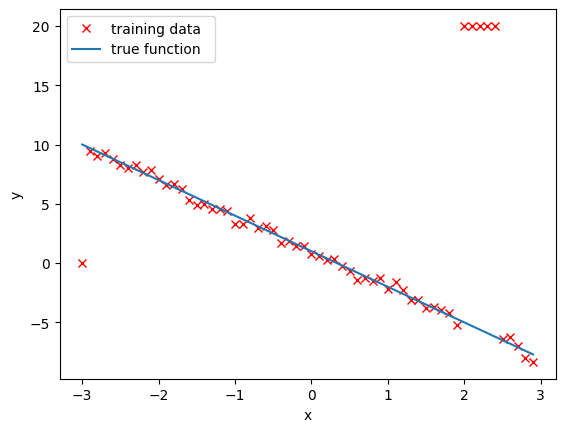

In [6]:
train_data = Data()
val_data = Data(train = False)

plt.plot(train_data.x.numpy(), train_data.y.numpy(), 'xr', label="training data ")
plt.plot(train_data.x.numpy(), train_data.f.numpy(), label="true function  ")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [7]:
class linear_regression(nn.Module):
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        yhat = self.linear(x)
        return yhat

criterion = nn.MSELoss()
trainloader = DataLoader(dataset = train_data, batch_size = 1)

learning_rates=[0.0001, 0.001, 0.01, 0.1]

train_error=torch.zeros(len(learning_rates))
validation_error=torch.zeros(len(learning_rates))

MODELS=[]

In [8]:
def train_model_with_lr (iter, lr_list):
    # iterate through different learning rates
    for i, lr in enumerate(lr_list):
        model = linear_regression(1, 1)
        optimizer = optim.SGD(model.parameters(), lr = lr)
        for epoch in range(iter):
            for x, y in trainloader:
                yhat = model(x)
                loss = criterion(yhat, y)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

        # train data
        Yhat = model(train_data.x)
        train_loss = criterion(Yhat, train_data.y)
        train_error[i] = train_loss.item()

        # validation data
        Yhat = model(val_data.x)
        val_loss = criterion(Yhat, val_data.y)
        validation_error[i] = val_loss.item()
        MODELS.append(model)

train_model_with_lr(10, learning_rates)

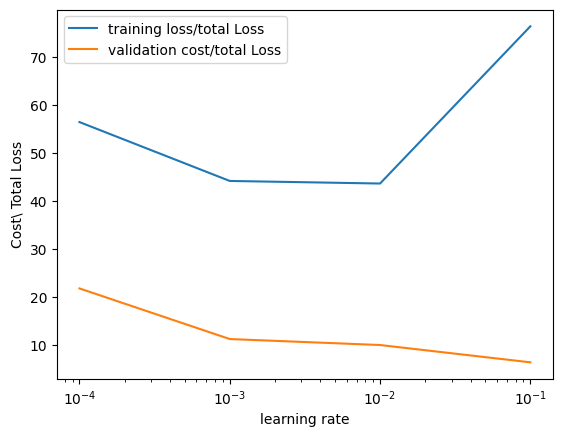

In [9]:
plt.semilogx(np.array(learning_rates), train_error.numpy(), label = 'training loss/total Loss')
plt.semilogx(np.array(learning_rates), validation_error.numpy(), label = 'validation cost/total Loss')
plt.ylabel('Cost\ Total Loss')
plt.xlabel('learning rate')
plt.legend()
plt.show()

0 [[0.98640084]
 [0.9439014 ]
 [0.90140176]]
1 [[5.5607066]
 [5.445402 ]
 [5.330097 ]]
2 [[6.6001678]
 [6.463342 ]
 [6.326516 ]]
3 [[14.658075]
 [14.214634]
 [13.771193]]


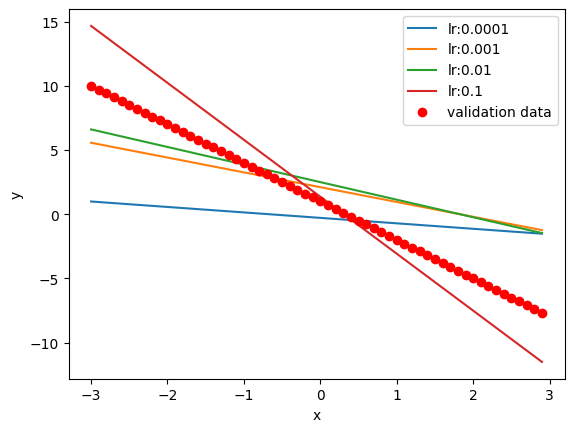

In [10]:
# Plot the predictions
i = 0
for model, learning_rate in zip(MODELS, learning_rates):
    yhat = model(val_data.x)
    plt.plot(val_data.x.numpy(), yhat.detach().numpy(), label = 'lr:' + str(learning_rate))
    print(i, yhat.detach().numpy()[0:3])
    i+=1
plt.plot(val_data.x.numpy(), val_data.f.numpy(), 'or', label = 'validation data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()